# Assignment 1 Starter Notebook (TensorFlow/Keras)
## Foundations of Neural Networks and Backpropagation (Weeks 2–3)

**Lectures covered:** Week 2–3 (Supervised learning, loss functions, perceptron-style model, MLPs, backpropagation concept & implementation)

**Dataset:** California Housing Prices (1990 U.S. Census) via scikit-learn

> This notebook is a starter template. Complete all **TODO** sections and ensure results are reproducible (set seeds).


In [1]:
# === Imports ===
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2026-01-28 20:46:27.940275: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-28 20:46:27.940326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-28 20:46:27.941851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-28 20:46:27.950630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-28 20:46:30.842939: W tensorflow/comp

In [2]:
# === Reproducibility ===
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("TensorFlow:", tf.__version__)

TensorFlow: 2.15.1


## Q1. Load dataset (required access method)

### Load California Housing Dataset

- We load the California Housing dataset using `scikit-learn` with `as_frame=True` to obtain pandas objects.  
- `X` contains the feature matrix (20,640 samples × 8 features), and `y` contains the target variable representing median house value.


In [3]:
# Required access method:
data = fetch_california_housing(as_frame=True)

X = data.data  # pandas DataFrame of shape (20640, 8)
y = data.target  # pandas Series

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (20640, 8)
y shape: (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## ✅ Student Instructions (Start Here)

Your work begins in the next **code cells (Q2–Q10)** and continues by answering questions in the **Markdown cells (Q11–Q14)**. These correspond to the questions listed in the assignment description on Canvas.. Complete each cell by following the instructions provided in the **preceding Markdown cells**.

Please:
- **Read the instructions carefully** before coding.
- Take your time to **understand each question** and implement the required steps.
- Each code cell includes **partial starter code**—your task is to **fill in the missing parts** and ensure the cell runs correctly.

If you need clarification at any point, please contact the **teaching staff (instructor/TA)** for support.


## Q2. Train/Validation/Test split

### 🔹 Dataset Splitting (Train / Validation / Test)

#### What you need to do:
1. **Split the dataset into three parts** using a **70/15/15 ratio**:
   - 70% for training
   - 15% for validation
   - 15% for testing

2. **Perform the split in two steps**:
   - First, split the data into **training (70%)** and a temporary set (30%)
   - Then, split the temporary set evenly into **validation** and **test** sets

3. **Ensure reproducibility**
   - Use the provided random seed for all splits

4. **Verify the result**
   - Print and confirm the shapes of the training, validation, and test sets
   - Check that the splits approximately match the 70/15/15 ratio


In [4]:
# TODO: Use a 70/15/15 split (train/val/test).
# Hint: split once into train+temp, then temp into val/test.

RANDOM_STATE = 42
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=RANDOM_STATE)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE)

print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

n = len(X)
print("Ratios:", len(X_train)/n, len(X_val)/n, len(X_test)/n)


Train: (14448, 8) (14448,)
Val: (3096, 8) (3096,)
Test: (3096, 8) (3096,)
Ratios: 0.7 0.15 0.15


## Q3. Preprocessing (standardize numeric features)

### 🔹 Feature Standardization & Target Preparation

In this step, you will prepare the dataset for training a neural network.

#### What you need to do:
1. **Standardize the input features** using **only the training set statistics**.
   - Fit the scaler on `X_train`
   - Apply the same transformation to `X_val` and `X_test`
   - Do **not** refit the scaler on validation or test data

2. **Convert target variables to `float32`**
   - This ensures compatibility with TensorFlow models
   - Apply the conversion consistently to training, validation, and test targets

3. **Verify data types**
   - Print the data types of the standardized features and targets
   - Confirm that inputs are numeric and targets are `float32`

📌 **Why this matters**:  
Using training-only statistics prevents data leakage, and ensuring consistent data types avoids runtime errors during model training.

When completed, you should have:
- Standardized feature matrices: `X_train_s`, `X_val_s`, `X_test_s`
- Float32 target arrays: `y_train_f`, `y_val_f`, `y_test_f`


In [5]:
# Standardize features using statistics from the training set only.

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_val_s   = scaler.transform(X_val)
X_test_s  = scaler.transform(X_test)

# Convert targets to float32 for TensorFlow

y_train_f = y_train.to_numpy().astype("float32")
y_val_f   = y_val.to_numpy().astype("float32")
y_test_f  = y_test.to_numpy().astype("float32")

print(X_train_s.dtype, y_train_f.dtype)

float64 float32


## Q4. Build models: (A) Single-layer network, (B) MLP

### 🔹 Model Architecture Construction

In this step, you will define and inspect two neural network models for a regression task.

#### What you need to do:
1. **Implement a single-layer model (Perceptron-style)**
   - Create a neural network with **no hidden layers**
   - Use a **single linear output neuron**
   - This model serves as a **baseline** equivalent to linear regression

2. **Implement a Multi-Layer Perceptron (MLP)**
   - Include **at least two hidden layers**
   - Use a nonlinear activation function (e.g., ReLU)
   - End with a **linear output layer** for regression

3. **Initialize both models using the input feature dimension**
   - Determine `input_dim` from the standardized training data
   - Ensure model input shapes match the feature matrix

4. **Inspect the model architectures**
   - Print the model summaries
   - Verify the number of layers, parameters, and output shapes

📌 **Why this matters**:  
Comparing a linear model with a deeper MLP helps you understand how network depth and nonlinearity affect learning capacity and performance.

When completed, you should have:
- A **baseline single-layer model**
- A **deeper MLP model**
- Printed summaries confirming correct architecture


In [6]:
def build_single_layer_model(input_dim: int) -> keras.Model:
    """Perceptron-style: no hidden layers (linear regression)."""
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(1)  # linear output
    ])
    return model


def build_mlp_model(input_dim: int, hidden_units=(128, 64), activation="relu") -> keras.Model:
    """MLP with at least two hidden layers."""
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(hidden_units[0], activation=activation),
        layers.Dense(hidden_units[1], activation=activation),
        layers.Dense(1)  # linear output for regression
    ])
    return model


input_dim = X_train_s.shape[1]
single_layer = build_single_layer_model(input_dim)
mlp = build_mlp_model(input_dim)

# Model Summary
single_layer.summary()
mlp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1152      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
To

## Q5. Loss functions study (MSE vs MAE)

### 🔹 Model Compilation, Training, and Loss Comparison

In this step, you will compile and train the **same MLP architecture** using **different loss functions**, then compare their learning behavior.

#### What you need to do:
1. **Compile the model**
   - Use **Stochastic Gradient Descent (SGD)** as the optimizer
   - Set an appropriate learning rate
   - Select a regression loss function (`MSE` or `MAE`)
   - Track performance using **RMSE** and **MAE** metrics

2. **Train the model**
   - Train the model using the **training set**
   - Monitor performance on the **validation set**
   - Use the same number of epochs and batch size for fair comparison

3. **Repeat training with different loss functions**
   - Train one model using **Mean Squared Error (MSE)**
   - Train another model using **Mean Absolute Error (MAE)**
   - Keep all other hyperparameters identical

4. **Visualize and compare learning curves**
   - Plot training and validation loss for both models
   - Compare convergence speed and stability across loss functions

📌 **Why this matters**:  
Different loss functions emphasize errors differently. MSE penalizes large errors more strongly, while MAE is more robust to outliers. Comparing them helps you understand how loss choice affects optimization and model behavior.

When completed, you should be able to answer:
- Which loss converges faster?
- Which loss shows more stable validation performance?
- How does the choice of loss affect overfitting or underfitting?


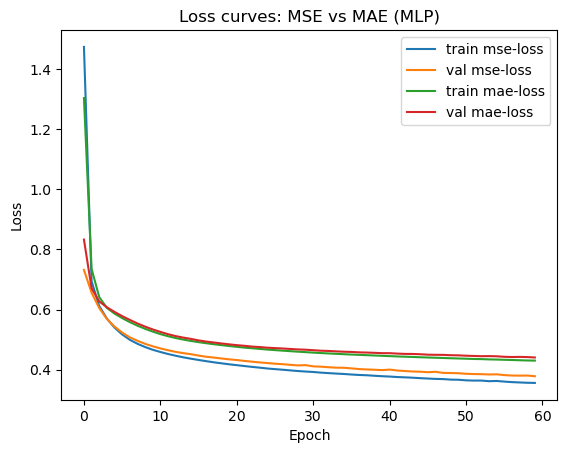

In [8]:
   def compile_and_fit(
    model: keras.Model,
    loss_name: str,
    lr: float = 1e-3,
    epochs: int = 60,
    batch_size: int = 32
):
    model = keras.models.clone_model(model)
    model.build((None, X_train_s.shape[1]))

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=lr),
        loss=loss_name,
        metrics=[
            keras.metrics.RootMeanSquaredError(name="rmse"),
            keras.metrics.MeanAbsoluteError(name="mae")
        ]
    )

    history = model.fit(
        X_train_s, y_train_f,
        validation_data=(X_val_s, y_val_f),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )
    return model, history


# TODO: Run the same MLP architecture with MSE and MAE
mlp_mse, hist_mse = compile_and_fit(mlp, loss_name="mse", lr=1e-3, epochs=60)
mlp_mae, hist_mae = compile_and_fit(mlp, loss_name="mae", lr=1e-3, epochs=60)


# Plot losses
plt.figure()
plt.plot(hist_mse.history["loss"], label="train mse-loss")
plt.plot(hist_mse.history["val_loss"], label="val mse-loss")
plt.plot(hist_mae.history["loss"], label="train mae-loss")
plt.plot(hist_mae.history["val_loss"], label="val mae-loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss curves: MSE vs MAE (MLP)")
plt.show()

## Q6. Learning-rate / gradient descent behavior (3 learning rates)

### 🔹 Learning Rate Sensitivity Analysis

In this step, you will study how the **learning rate** affects model convergence and stability when training a neural network.

#### What you need to do:
1. **Train the same MLP model using multiple learning rates**
   - Use **at least three different learning rates** (e.g., `1e-4`, `1e-3`, `1e-2`)
   - Keep the **model architecture, loss function, optimizer, batch size, and number of epochs the same**
   - Change **only the learning rate** for a fair comparison

2. **Record training results**
   - Store the training history for each learning rate
   - Focus on the **validation loss** to assess generalization

3. **Visualize convergence behavior**
   - Plot validation loss vs. epoch for each learning rate on the same graph
   - Clearly label each curve with its learning rate

4. **Analyze the results**
   - Identify which learning rate converges **too slowly**
   - Identify which learning rate is **unstable or diverges**
   - Determine which learning rate provides the **best balance of speed and stability**

📌 **Why this matters**:  
The learning rate controls the step size of optimization. Too small leads to slow learning; too large can cause instability or divergence. Selecting an appropriate learning rate is critical for effective training.

When completed, you should be able to explain:
- How learning rate affects convergence speed
- Why some learning rates fail
- Which learning rate you would choose for this task and why


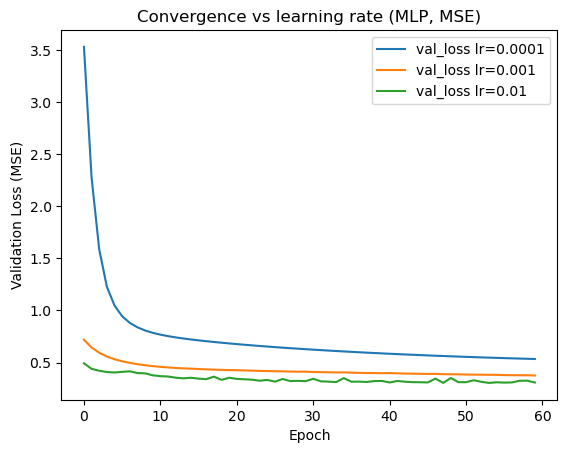

In [9]:
# TODO: Train the same MLP under at least 3 learning rates (e.g., 1e-4, 1e-3, 1e-2)
lrs = [1e-4, 1e-3, 1e-2]
histories = {}

for lr in lrs:
    model_lr, hist_lr = compile_and_fit(
        mlp,
        loss_name="mse",
        lr=lr,
        epochs=60
    )
    histories[lr] = hist_lr
   
plt.figure()
for lr in lrs:
    plt.plot(histories[lr].history["val_loss"], label=f"val_loss lr={lr:g}")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss (MSE)")
plt.legend()
plt.title("Convergence vs learning rate (MLP, MSE)")
plt.show()

## Q7. Backpropagation evidence: layer-wise gradient norms

### 🔹 Gradient Norm Diagnostics (Vanishing / Exploding Gradients)

In this step, you will **measure gradient norms** to diagnose whether a network may suffer from **vanishing** or **exploding** gradients.

#### What you need to do:
1. **Compute gradient norms for a single mini-batch**
   - Use a `GradientTape` to compute gradients of the loss w.r.t. the model’s trainable variables
   - Compute the **L2 norm** of each gradient tensor (one per weight/bias variable)

2. **Verify the diagnostic output**
   - Print the batch loss value
   - Print the number of trainable variables
   - Print the first few gradient norms
   - Sanity-check that gradients are **not all `0`**, **not `NaN`**, and **not extremely large**

3. **Interpret what the norms mean (conceptually)**
   - **Very small norms** (close to 0 across layers) can indicate **vanishing gradients**
   - **Very large norms** (spiking to huge values) can indicate **exploding gradients**
   - Healthy training often shows **moderate, non-zero** norms that vary by layer

4. **TODO Extension (Required) — Track gradient norms across epochs**
   - During training, **record gradient norms repeatedly** (e.g., every epoch, or every N batches)
   - Store them in a structured format (e.g., list/dict keyed by epoch and layer/variable)
   - Create a plot (or table) showing how gradient norms change over time
   - Use this evidence to answer **Q4** (analysis of gradient flow problems)

📌 **Why this matters**:  
Gradient norms provide direct evidence of gradient flow quality. Tracking them over training helps you connect theory (vanishing/exploding gradients) to observed optimization behavior.

When completed, you should be able to answer:
- Do gradients shrink as they propagate to earlier layers?
- Do gradients spike or become unstable?
- How does this relate to learning rate, initialization, or activation choice?


In [ ]:
# Utility to compute gradient norms per layer for one batch
@tf.function
def batch_grad_norms(model, x_batch, y_batch, loss_fn):
    with tf.GradientTape() as tape:
        y_pred = model(__________, training=__________)
        loss = loss_fn(y_batch, y_pred)
    grads = tape.gradient(__________, model.trainable_variables)
    norms = [tf.__________(g) for g in grads if g is not None]
    return loss, norms


# Prepare a small batch
x_b = tf.convert_to_tensor(X_train_s[:512], dtype=tf.__________)
y_b = tf.convert_to_tensor(y_train_f[:512], dtype=tf.__________)


# Use a freshly compiled model (MSE)
probe_model = keras.models.__________(mlp)
probe_model.build((__________, X_train_s.shape[__________]))
loss_fn = keras.losses.__________()


# Initialize weights by running one forward pass
_ = probe_model(__________)


loss_val, norms = batch_grad_norms(probe_model, x_b, y_b, loss_fn)

print("Batch loss:", float(loss_val))
print("Num trainable vars:", len(probe_model.trainable_variables))
print("First 10 grad norms:", [float(n) for n in norms[:10]])


## Q8. Depth study: 1 vs 3 vs 5 hidden layers

### 🔹 Depth vs Performance (Optimization Effects in Deep Networks)

In this step, you will investigate how **network depth** affects training dynamics and generalization.

#### What you need to do:
1. **Build multiple MLP models with different depths**
   - Use the provided function to create a “deep MLP” where:
     - `depth` controls the number of hidden layers
     - `width` controls the number of units per hidden layer
   - Train **at least three depths** (e.g., `1`, `3`, `5`) while keeping everything else constant

2. **Train each model under the same conditions (fair comparison)**
   - Same optimizer (SGD), same loss (`mse`), same learning rate, same epochs, same batch size
   - Change **only depth** so you can isolate its effect

3. **Compare validation loss curves**
   - Plot validation loss vs. epoch for each depth on one graph
   - Observe:
     - Which depth converges fastest?
     - Which depth shows instability (noisy or diverging validation loss)?
     - Which depth appears to overfit or underfit?

4. **TODO (Required): Evaluate final test performance for each depth**
   - After training each model, compute test metrics (at minimum):
     - **RMSE**
     - **MAE**
   - Record results in a small table (depth → RMSE/MAE)

5. **Discuss optimization effects**
   In your written analysis, address:
   - Why deeper networks may train more slowly or become unstable
   - Whether you observe signs of vanishing/exploding gradients as depth increases
   - Whether deeper networks actually generalize better on the test set, or just overfit
   - One improvement you would try (e.g., better initialization, batch norm, residual connections, different learning rate)

📌 **Why this matters**:  
Increasing depth increases model capacity, but it can also make optimization harder. This experiment helps you connect depth to training stability and generalization.

When completed, you should be able to justify:
- Which depth is best for this dataset
- Whether deeper is truly better here, based on **test metrics**, not just training loss


In [ ]:
def build_deep_mlp(input_dim: int, depth: int, width: int = 128, activation="relu") -> keras.Model:
    layers_list = [layers.Input(shape=(input_dim,))]
    for _ in range(depth):
        layers_list.append(layers.Dense(__________, activation=__________))
    layers_list.append(layers.Dense(__________))
    return keras.Sequential(layers_list)

depths = [1, 3, 5]
depth_hist = {}

for d in depths:
    model_d = build_deep_mlp(input_dim, depth=__________, width=__________, activation="__________")
    model_d, hist_d = compile_and_fit(model_d, loss_name="__________", lr=1e-3, epochs=60)
    depth_hist[d] = __________

plt.figure()
for d in depths:
    plt.plot(depth_hist[d].history["val_loss"], label=f"depth={d}")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss (MSE)")
plt.legend()
plt.title("Validation loss vs depth (MLP)")
plt.show()

# TODO: Evaluate final test metrics for each depth and discuss optimization effects.

## Q9. Final evaluation (test set)

### 🔹 Final Model Evaluation

#### What you need to do:
1. **Select your best model** based on validation performance from previous experiments.
2. **Evaluate the selected model** on both the **validation** and **test** sets.
3. **Report key metrics** (loss, RMSE, MAE).
4. **Briefly explain**:
   - Why this model was chosen
   - Whether test performance matches validation performance


In [ ]:
def evaluate(model: keras.Model, X, y):
    return dict(zip(model.metrics_names, model.evaluate(X, y, verbose=0)))

# Choose one trained model as your final (TODO: replace with your best model)
final_model = ____________

results_test = evaluate(final_model, ____________, ____________)
results_val  = evaluate(final_model, ____________, ____________)

print("Validation:", results_val)
print("Test:", results_test)

## Results & Discussion (Answer Each Question Clearly)

- **Review and answer the following questions carefully briefly**


### Q10. Loss Functions (MSE vs MAE)
- Which loss **converged faster**?
- Which achieved **lower validation loss**?
- Why did their behaviors differ (outlier sensitivity, gradient properties)?


**Which loss converged faster?**  
  The model trained with **Mean Squared Error (MSE)** converged faster. Its training and validation loss decreased more rapidly during the early epochs compared to MAE.

**Which achieved lower validation loss?**  
  The **MSE-based model** achieved a lower final validation loss than the MAE-based model.

**Why did their behaviors differ?**  
  MSE penalizes larger errors more heavily due to the squared term, resulting in larger gradients when predictions are far from the target. This leads to faster convergence but higher sensitivity to outliers. In contrast, MAE applies a constant gradient magnitude, making it more robust to outliers but slower to converge and harder to optimize using gradient-based methods.


### Q11. Model Capacity (Single-Layer vs Multi-Layer)
- How does the **perceptron** perform compared to the **MLP**?
- What limitations does the single-layer model show (linear decision function, underfitting)?

The MLP performs much better than the Perceptron. The Perceptron's RMSE/MAE values on both the training and validation sets will be much higher.

**Limitations of the Single-Layer Model:**
1. Linearity - without the hidden layers and non-linear activations, the model is restricted to learning only linear relationships.

2. Lack of Capacity- The California Housing dataset contains complex, non-linear patterns that a linear model simply cannot capture. The model lacks the capacity to represent these feature interactions.

### Q12. Effect of Network Depth
- Compare **1 vs 3 vs 5 hidden layers**:
  - Convergence speed
  - Stability during training
  - Validation/test generalization
- What trade-offs are observed as depth increases?

**Type your answer here:**

### Q13. Conclusion (Answer Explicitly)

- Which **model configuration** performed best and **why** (cite metrics/figures)?
- What **one limitation** of feedforward networks did you observe (e.g., hyperparameter sensitivity, gradient issues, overfitting)?

**Type your answer here:**

### 🎉 Congratulations!

You have successfully completed **Assignment 1**. Excellent work engaging with the fundamental concepts of **multi-layer perceptrons** and **backpropagation**.

### **Submission Instructions**

Please submit a **GitHub repository link** on Canvas that contains:
- The **completed Jupyter notebook**
- Any additional files required for the assignment (if applicable)

Before submitting, ensure that:
- All **code cells (Q2–Q9)** have been executed successfully
- All **Markdown responses (Q10–Q13)** have been completed
- The notebook is **saved after execution** so that outputs are visible

Once verified, **push the final version to GitHub** and submit the repository link on Canvas.

